Hexanome: 4243

Auteurs: NGO Ngoc Minh, PHUNG Minh, QI Jiaqi

# Introduction

Ce jeu de données contient les prix de vente des maisons pour le King County, qui comprend Seattle. Il comprend les maisons vendues entre mai 2014 et mai 2015. Nous allons utiliser plusieurs modèles de machine learning pour prédire le prix des maisons.

In [123]:
# lecture le fichier

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Traitement et visualisation des données

Dans un premier temps, nous faisons la lecture des données et affichons les cinq premiers valeurs. Nous constatons bien 21 colonnes ainsi que la signification de chaque variable. Par exemple, 'date' représente la date de vente, 'bedrooms' représente la quantité de chambres, 'lat' et  'long' représentent la position GPS.

In [124]:
# lecture des données avec Pandas

import pandas as pd

df = pd.read_csv(r'C:\Users\DELL\Desktop\ML\Kaggle\kc_house_data.csv')
# ('/kaggle/input/housesalesprediction/kc_house_data.csv')

# affichage des premières cinq lignes 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Afin de faciliter notre recherche suivante, nous voulons savoir le type de chaque attribut. Il existe une colonne qui s'appelle 'date', son type est 'object'. Nous ne pouvons pas faire la régression avec ce type, il est nécessaire de faire la conversion de type pour quantifier cette colonne.

In [125]:
# affichage des information sur les données

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

 Nous choisissons de la diviser en trois nouvelles colonnes, 'year', 'month' et 'day'. Parce que nous pouvons obtenir plus d'informations, nous pouvons connaître une tendance des prix plus précise en fonction de nouvelles variables.

In [126]:
# division d'une colonne en trois colonnes associées

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.drop("date",axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


De plus, il n'y a pas de valeurs nulles dans nos données, nous n'avons pas besoin de faire des traitements supplémentaires.

In [127]:
# compte du nombre null pour chaque colonne

df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

Nous calculons les statistiques afin d'avoir une vue sur la distribution des données. Nous prenons l'exemple de la variable 'sqft_living15'.

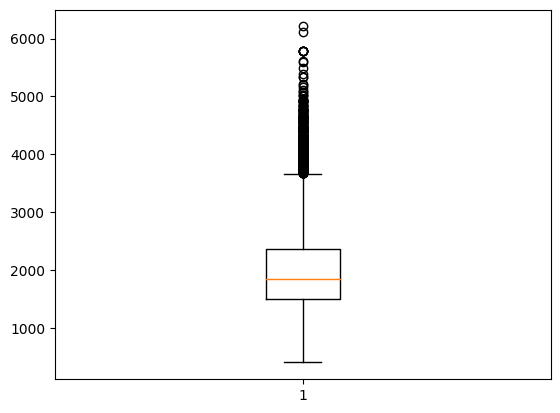

In [128]:
# visualisation de la distribution

import matplotlib.pyplot as plt

plt.boxplot(df['sqft_living15'])
plt.show()

(array([3.000e+00, 3.100e+01, 2.780e+02, 1.064e+03, 2.205e+03, 3.171e+03,
        2.844e+03, 2.537e+03, 2.206e+03, 1.664e+03, 1.389e+03, 1.147e+03,
        8.690e+02, 6.690e+02, 4.660e+02, 3.280e+02, 2.330e+02, 1.700e+02,
        1.160e+02, 7.400e+01, 4.500e+01, 4.000e+01, 3.000e+01, 1.400e+01,
        6.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 0.000e+00, 2.000e+00]),
 array([ 399. ,  592.7,  786.4,  980.1, 1173.8, 1367.5, 1561.2, 1754.9,
        1948.6, 2142.3, 2336. , 2529.7, 2723.4, 2917.1, 3110.8, 3304.5,
        3498.2, 3691.9, 3885.6, 4079.3, 4273. , 4466.7, 4660.4, 4854.1,
        5047.8, 5241.5, 5435.2, 5628.9, 5822.6, 6016.3, 6210. ]),
 <BarContainer object of 30 artists>)

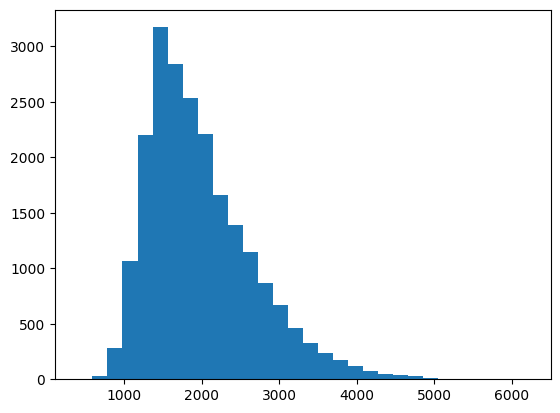

In [129]:
plt.hist(df['sqft_living15'], bins = 30)

Il existe beaucoup de valeurs aberrantes sur la figure box-plot, mais nous ne voulons pas les supprimer directement. Par ailleurs, certaines variables ne suivent pas la distribution normale, il existe un décalge à gauche ou à droite. Nous gardons ces données après avoir appliqué une transformation. Nous allons utiliser la méthode Box-Cox pour ajuster la distribution pour certaines variables et aussi la transformation logarithmique qui est aussi utile.

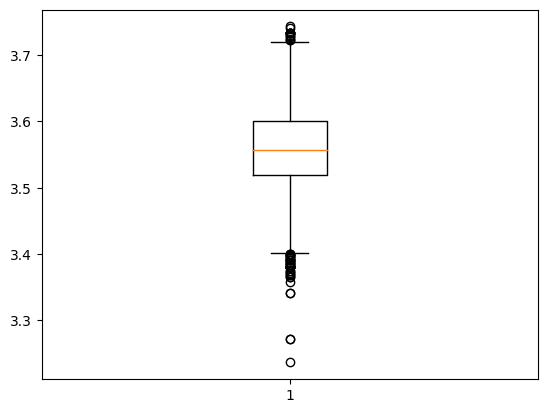

In [130]:
# transformation des données avec Box-Cox

from scipy import stats

df.sqft_living15,lambda_=stats.boxcox(df.sqft_living15)
plt.boxplot(df['sqft_living15'])
plt.show()

(array([1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 7.000e+00, 1.600e+01, 3.300e+01, 8.500e+01, 1.660e+02,
        3.390e+02, 6.510e+02, 9.710e+02, 1.582e+03, 2.191e+03, 2.415e+03,
        2.302e+03, 2.295e+03, 2.089e+03, 1.912e+03, 1.638e+03, 1.246e+03,
        8.120e+02, 4.700e+02, 2.460e+02, 1.060e+02, 2.500e+01, 1.100e+01]),
 array([3.23664911, 3.2535235 , 3.27039788, 3.28727227, 3.30414666,
        3.32102104, 3.33789543, 3.35476981, 3.3716442 , 3.38851859,
        3.40539297, 3.42226736, 3.43914175, 3.45601613, 3.47289052,
        3.4897649 , 3.50663929, 3.52351368, 3.54038806, 3.55726245,
        3.57413684, 3.59101122, 3.60788561, 3.62475999, 3.64163438,
        3.65850877, 3.67538315, 3.69225754, 3.70913192, 3.72600631,
        3.7428807 ]),
 <BarContainer object of 30 artists>)

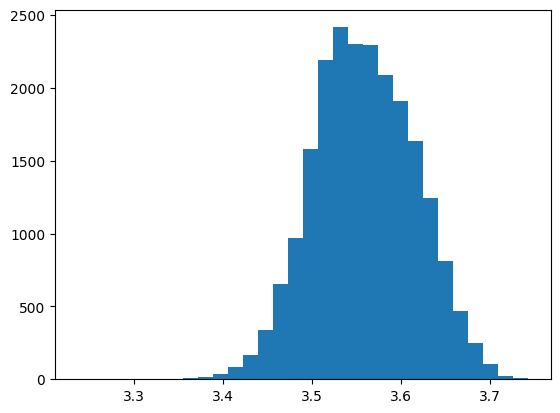

In [131]:
plt.hist(df['sqft_living15'], bins = 30)

Après la transformation de Box-Cox, la normalité, la symétrie et l'égalité de la variance des données peuvent être améliorées de manière significative.

In [132]:
#df.sqft_living,lambda_=stats.boxcox(df.sqft_living)
#df.grade,lambda_=stats.boxcox(df.grade)
#df.sqft_above,lambda_=stats.boxcox(df.sqft_above)

La distribution de cette variable est proche de la fonction expotentielle, nous essayons d'appliquer la fonction logarithmique.

(array([1.9884e+04, 9.2300e+02, 3.0400e+02, 1.0500e+02, 1.0200e+02,
        5.2000e+01, 1.9000e+01, 2.3000e+01, 2.7000e+01, 9.9000e+01,
        3.4000e+01, 6.0000e+00, 7.0000e+00, 6.0000e+00, 6.0000e+00,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([6.51000000e+02, 2.24147250e+04, 4.41784500e+04, 6.59421750e+04,
        8.77059000e+04, 1.09469625e+05, 1.31233350e+05, 1.52997075e+05,
        1.74760800e+05, 1.96524525e+05, 2.18288250e+05, 2.40051975e+05,
        2.61815700e+05, 2.83579425e+05, 3.05343150e+05, 3.27106875e+05,
        3.48870600e+05, 3.70634325e+05, 3.92398050e+05, 4.14161775e+05,
        4.35925500e+05, 4.57689225e+05, 4.79452950e+05, 5.01216675e+05,
        5.22980400e+05

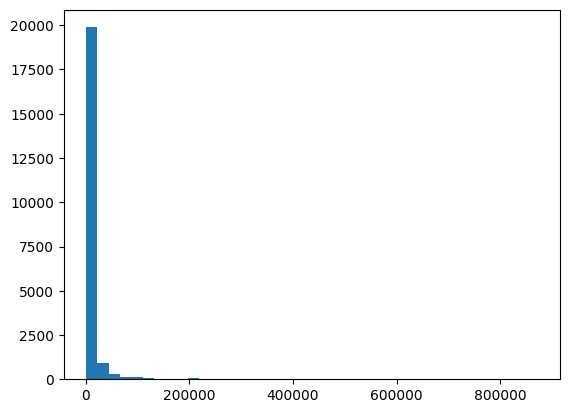

In [133]:
# transformation des données avec la fonction logarithmique

import numpy as np

plt.hist(df['sqft_lot15'], bins = 40)

(array([3.600e+01, 4.760e+02, 5.210e+02, 3.750e+02, 1.157e+03, 3.946e+03,
        5.679e+03, 5.456e+03, 1.655e+03, 6.440e+02, 3.160e+02, 6.440e+02,
        2.310e+02, 1.360e+02, 1.060e+02, 7.500e+01, 1.350e+02, 1.900e+01,
        4.000e+00, 2.000e+00]),
 array([ 6.47850964,  6.8384655 ,  7.19842136,  7.55837722,  7.91833308,
         8.27828894,  8.6382448 ,  8.99820067,  9.35815653,  9.71811239,
        10.07806825, 10.43802411, 10.79797997, 11.15793583, 11.51789169,
        11.87784755, 12.23780341, 12.59775927, 12.95771513, 13.31767099,
        13.67762685]),
 <BarContainer object of 20 artists>)

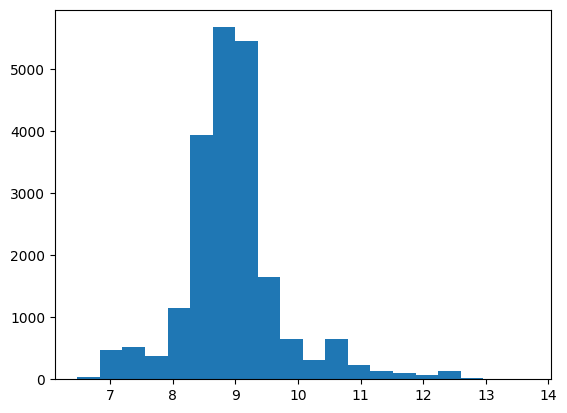

In [134]:
df.sqft_lot15 = np.log(df.sqft_lot15)
plt.hist(df['sqft_lot15'], bins = 20)

Nous constatons bien cette transformation logarithmique rend la distribution plus similaire à la distribution normale. De plus, cette transformation ne change pas les corrélations entre les variables.

Option: La noramalisation de nos données entre 0 et 1.

In [135]:
# normalisation entre 0 et 1

# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(df)
# df = scaler.transform(df)

Après notre traitement de base, nous voulons étudier les statistiques. Notre objectif est de prédire le prix selon des variables. De ce point de vue, nous voulons obtenir une prédiction de bonne qualité en choisissant les variables qui ont une haute corrélation avec la variable 'price'.

In [136]:
# classement des colonnes en calculant la corrélation

df.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
day             -0.014670
month           -0.010081
year             0.003576
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot         0.089661
yr_renovated     0.126434
sqft_lot15       0.147579
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.531448
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Pour les colonnes qui ont une corrélation très proche de zéro, nous les supprimons afin de ne pas influencer la qualité de notre prédiction, parce que cela représente que cette variable n'est pas pertinent au prix. Par exemple, 'id', 'day', 'month' et 'year'. Parce que 'id' est un peu aléatoire et c'est défini artificiellement, il n'existe pas de forte relation entre 'id' et le prix. Pour les variables concernant la date, nous avons observé que c'était des données centrées en 2014 et 2015, c'est compréhensible que la corrélation est petite.
Nous classons et dessinons le heatmap pour mieux visuliser les corrélations.

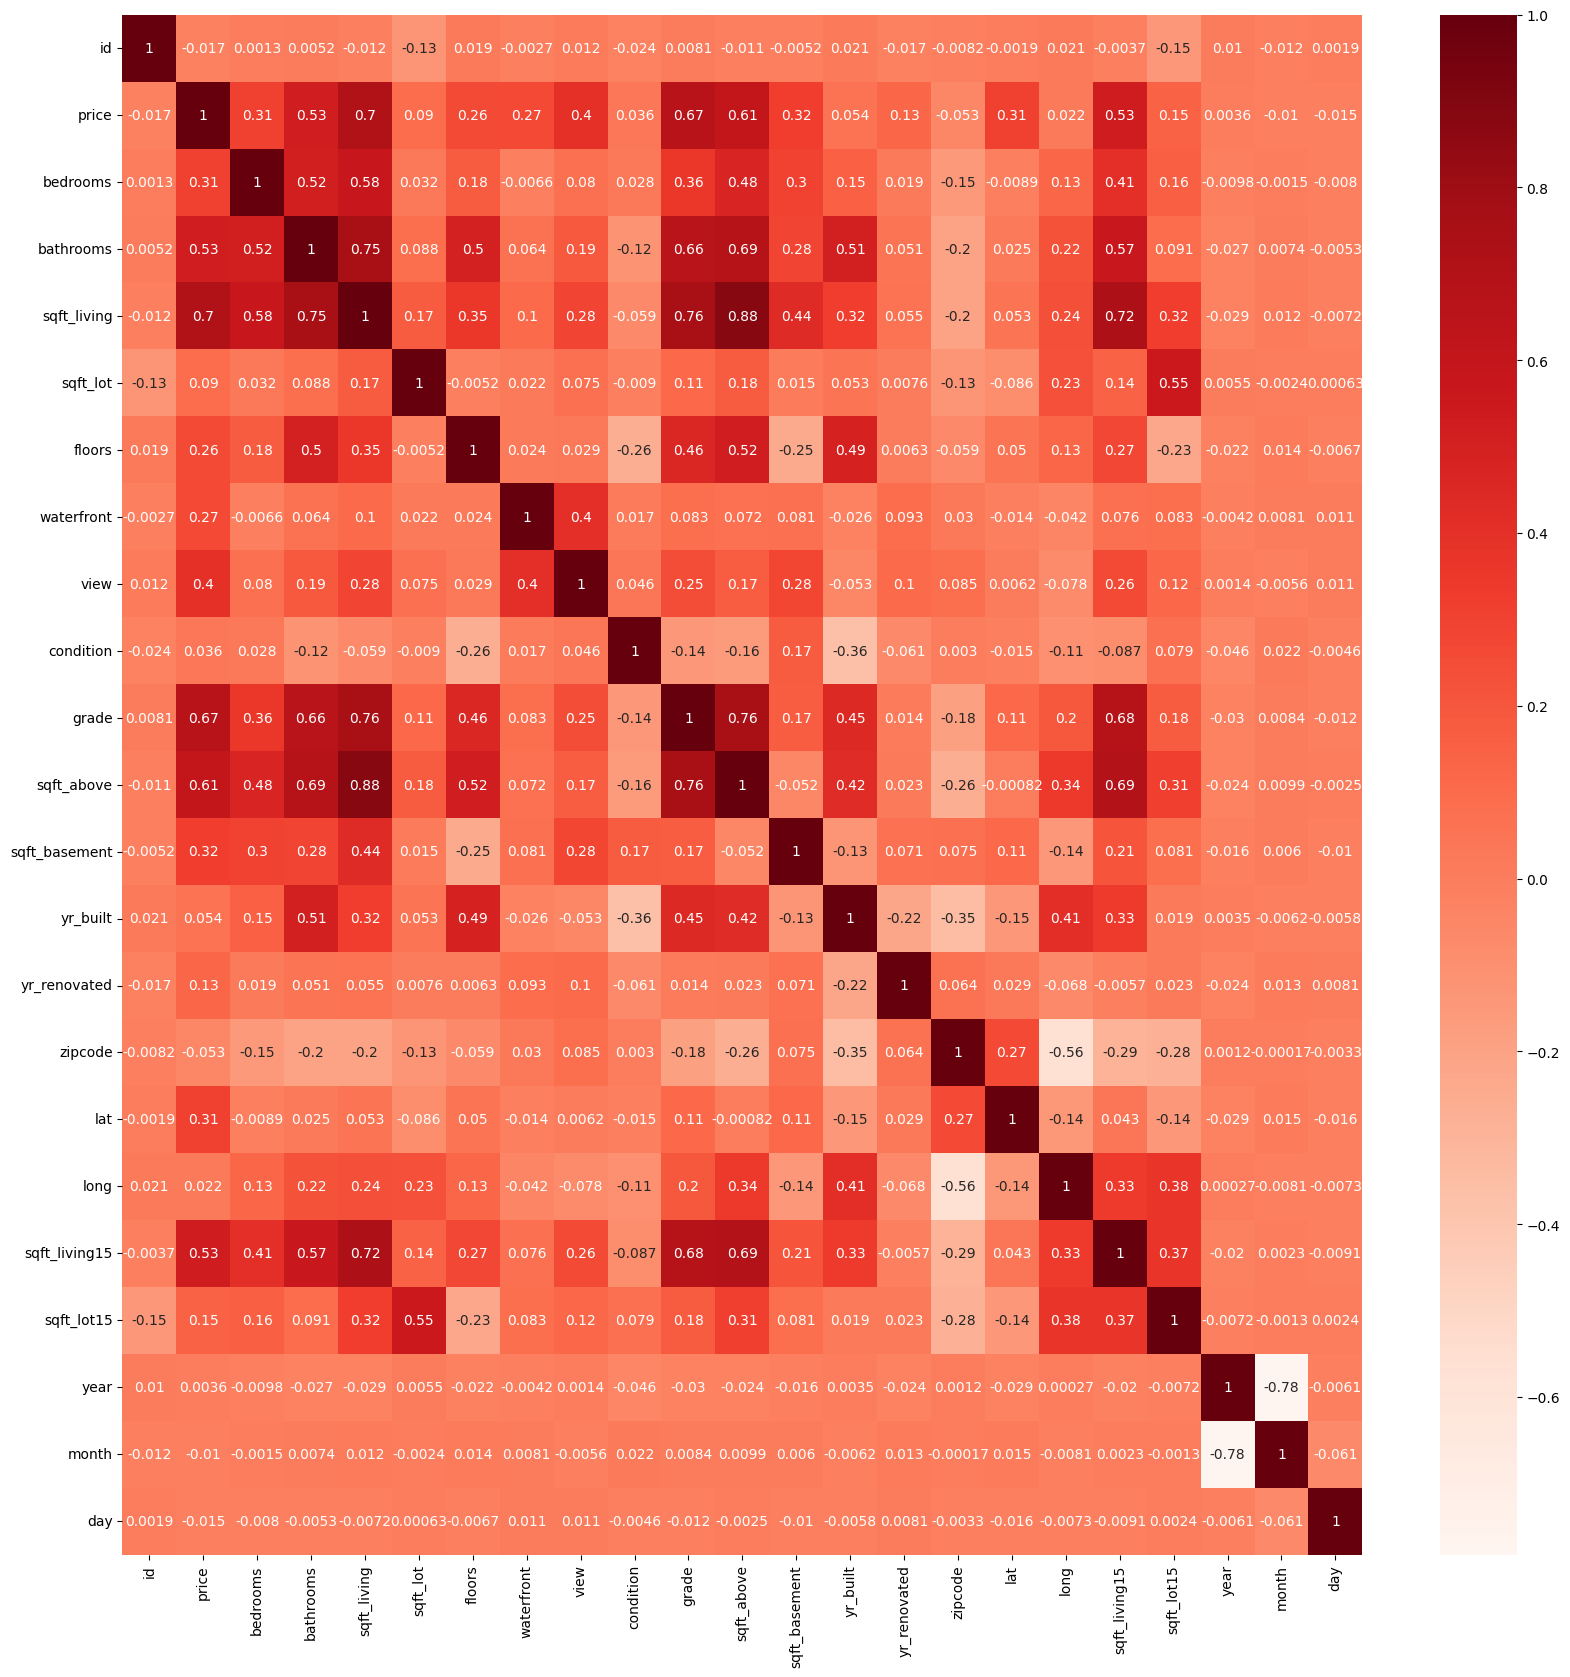

In [137]:
# visulisation des corrélation entre chaque paires 

from matplotlib import pyplot as plt
import seaborn as sns
cor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Pour garantir la qualité du modèle，nous supprimons les variables dont la corrélation est très faible. Il s'agit des variables "id", "day", "month" et "year", ainsi que de la variable "price", car c'est la variable que nous voulons prédire.

In [138]:
# préparation des ensembles

X = df.drop('price',axis=1)
X = X.drop('id', axis=1)
X = X.drop('day', axis=1)
X = X.drop('month', axis=1)
X = X.drop('year', axis=1)

# exemple pour visuliser

X_ex = X.head(20)
y_ex = df['price'].head(20)
X = X.values
y = df['price'].values

Nous dessinons aussi le heatmap dans la carte en fonction du prix afin d'avoir une première impression de nos données en réalité.

<Axes: xlabel='long', ylabel='lat'>

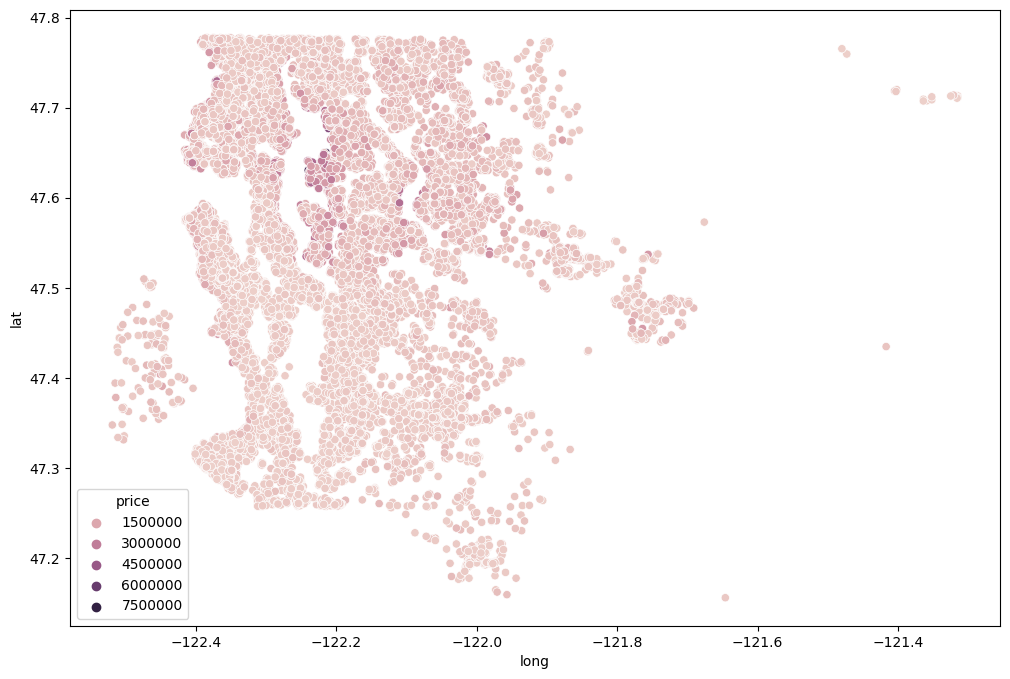

In [139]:
# visualisation du prix selon la position GPS

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize  =(12,8))
sns.scatterplot(x = 'long', y = 'lat', data=df,hue = 'price')

Jusqu'ici, nous avons fini notre traitement des données. Nous allons préparer notre première modèle, la régression linéaire.

# Entraînement des différents modèles

Faisant plusieurs régressions dans la suite, nous choisissons la validation croisée à K plis, nous pouvons sélectionner le meilleur hyperparamètre dont nous avons besoin. Même s'il n'y pas de hyperparamètres dans ce cas, elle nous aide à mieux entraîner plusieurs fois notre modèle pour réduire la variance. Premièrement, nous divisons nos données en deux parties, test et entraînement avec la pondération 0.2 et 0.8 respectivement. Nous avons divisé l'ensemble d'entraînement en 5 parties égales. Chaque fois nous prenons une partie comme un ensemble de validation et utilisons le reste des données comme ensemble d'entraînement. Cette opération est effectuée 5 fois et la moyenne (ou parfois le maximum) est calculée sur l'ensemble de validation. Enfin, pour chaque hyperparamètre, les moyennes des critères sont comparées afin de sélectionner le meilleur.

In [140]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(X_train.shape, X_test.shape)

(17290, 18) (4323, 18)


Pour la régression linéaire, nous utilisons les moindres carrés pour déterminer les paramètres optimaux du modèle. Il n'y a pas de hyperparamètres.

# Régression Linéaire

In [141]:
# regression linéaire simple

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lin = LinearRegression()
kf = KFold(n_splits = 5,shuffle=True, random_state=0)
k1 = cross_val_score(lin, X_train, y_train, cv = kf)
s1 = 0
for i in range(5):
    s1 += k1[i]
s1 = s1/5
s1

0.6969189975377773

Après avoir obtenu un modèle avec le meilleur paramètre sur l'ensemble d'entraînement, nous testons sur l'ensemble de test que nous n'avons jamais utilisé avant pour comparer avec les autres modèles. Finalement, nous pourrons choisir le meilleur modèle avec la meilleure qualité.

TEST - R2 score - Régression Linéaire:  0.7120055863639565


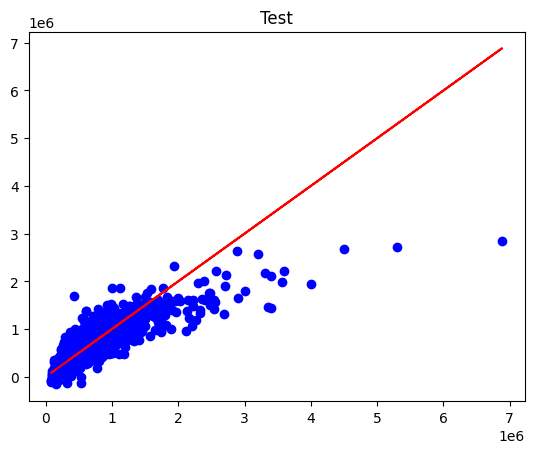

In [142]:
# test de la performance sur l'ensemble de test

from sklearn.metrics import r2_score

lin.fit(X_train, y_train)
X_pred = lin.predict(X_test)
plt.scatter(y_test, X_pred, color="b")
plt.plot(y_test, y_test, color="r")
plt.title('Test')
r2_lin = r2_score(y_test,X_pred)
print('TEST - R2 score - Régression Linéaire: ', r2_lin)

La régression linéaire est un peu simple dans ce cas, la droite rouge dans la figure ci-dessus ne représente pas totalement la tendance et la distribution des nouvelles données. Il existe des points qui sont loins de la valeurs réelles. Nous allons implémenter les modèles plus complexe dans la suite.

# Régression Ridge

In [143]:
# standarisation pour la ridge régression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)

Avant de commencer la régression ridge. La standarisation est nécessaire, parce que si les variables ne partagent pas la même échelle, l’intensité de
l’influence d’une variable sur la régularisation dépendrait de son échelle.

0.6969530369432861


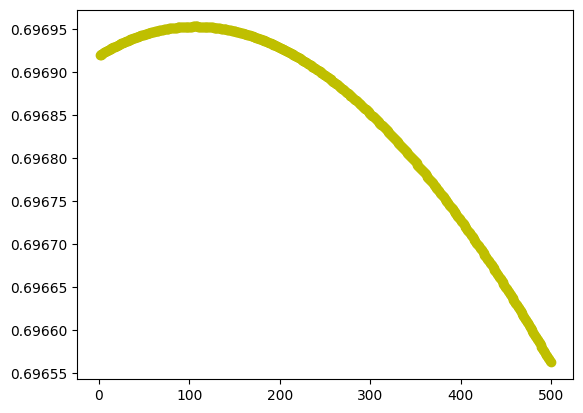

In [144]:
# ridge regression en utilisant K-fold cross validation 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

def ridge_score(a):
    lin_rig = Ridge(alpha = a)
    kf = KFold(n_splits = 5,shuffle=True, random_state=0)
    k2 = cross_val_score(lin_rig, X_train, y_train, cv = kf)
    s2 = 0
    for i in range(5):
        s2 += k2[i]
    return s2/5

# Affichage du ridge trace

alpha = []
beta = []
for i in range(500):
    if i == 0:
        continue
    alpha.append(i)
    beta.append(ridge_score(i))
print(max(beta))
plt.scatter(alpha, beta, color="y")

In [145]:
# hyperparamètre très grand

print('R2 avec un hyperparamètre très grand 1e8: ',ridge_score(1e8))

R2 avec un hyperparamètre très grand 1e8:  0.00037431026792766886


La valeur R2 ne change pas beaucoup, peut-être certaines lignes sont corrélées mais selon notre heat map, nous devrions plutôt dire que la régularisation n'est pas nécessaire pour nos données. Nous pourrions peut-être aussi considérer notre modèle linéaire, qui est assez simple. Le problème de sous-apprentissage nous apporte ce résultat, parce que quelle que soit la manière dont nous modifions le hyperparamètre, notre modèle ne représente pas particulièrement bien les données. Nous observons aussi que le changement de la valeur R2 respecte ce que nous pensons. Il augmente au début et une fois qu'il atteint la valeur optimale, la valeur R2 baisse de plus en plus. En effet, plus le hyperparamètre de régularisation est grand, moins les paramètres du modèle sont importants. Nous accepterons donc un biais plus grand en même temps avec une variance plus petite. C'est-à-dire que notre modèle adapte les nouvelles données mais la distance entre la valeur prédite et la valeur réelle est énorme. Nous obtenons bien une valeur R2 proche de zéro. Il prédit la moyenne des données pour assurer la variance.

Vu que nous avons presque 20 000 données, nous allons utiliser la méthodes LOOCV avec SVD afin d'augmenter la vistesse de calcul. Pour un hyperparamère, nous pouvons obtenir notre modèle en calculant une seule fois sur l'ensemble d'entraînement, au lieu de k ou n fois.

In [146]:
# régression ridge en utilisant leave-one-out validation croisée avec SVD 

from sklearn.linear_model import RidgeCV

list_alpha = [1e-5, 1e-3, 1e-1, 1, 10, 100, 1000, 100000]
lin_rig_svd = RidgeCV(alphas = list_alpha, gcv_mode = 'svd')
lin_rig_svd.fit(X_train, y_train)
lin_rig_svd.score(X_train, y_train)

0.6986931432703625

TEST - R2 score - Ridge Régression Linéaire:  0.7127543175703345


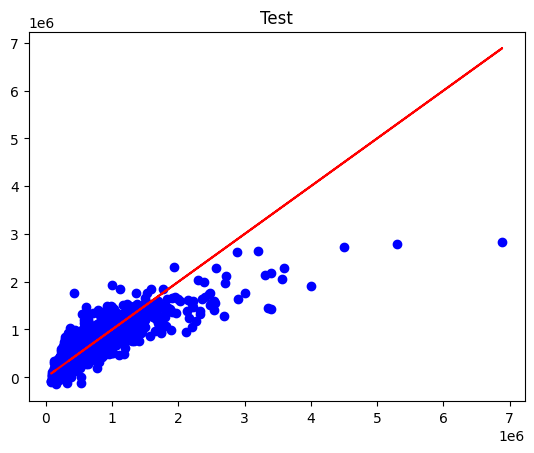

In [147]:
# test de la performance
X_pred = lin_rig_svd.predict(X_test)
plt.scatter(y_test, X_pred, color="b")
plt.plot(y_test, y_test, color="r")
plt.title('Test')
r2_lin_svd = r2_score(y_test,X_pred)
print('TEST - R2 score - Ridge Régression Linéaire: ', r2_lin_svd)

La régression ridge est un peu mieux que la régression linéaire, mais il n'y a pas beaucoup de différences. La régularisation n'est pas très utile dans notre cas.

In [148]:
#from sklearn.dummy import DummyRegressor

#dummy_regr = DummyRegressor(strategy="median")
#kf_test1 = KFold(n_splits = 5,shuffle=True, random_state=0)
#k2_test1 = cross_val_score(dummy_regr, X_train, y_train, cv = kf_test1)
#s2_test1 = 0
#for i in range(5):
    #s2_test1 += k2_test1[i]
#s2_test1/5

# Régression Ridge à noyau

Nous voulons donc implémenter la régerssion ridge à noyau. Cette méthode accumule les similarités entre les nouvelles valeurs et toutes les donnés d'entraînement. Nous tranformons nos données avec la fonction gaussienne et nous entraînons notre modèle de la régression ridge avec ces données. Grâce à notre noyau non linéaire, nous obtenons un modèle non liéaire entre les variables et la valeur à prédire. De point de vue de la faisabilité, nous avons nombreux de données, le calcul prend un temps inacceptable. Nous allons utiliser l'approximation Nystroem en sélectionnant certaines données au hasard pour optimiser le temps de calcul.

In [149]:
# ridge regression à noyau

#from sklearn.kernel_ridge import KernelRidge

#rig_ker = KernelRidge(alpha = 1, kernel = 'rbf')
#kf_ker = KFold(n_splits = 5,shuffle=True, random_state=0)
#k2_ker = cross_val_score(rig_ker, X_train, y_train, cv = kf_ker)
#s2_ker = 0
#for i in range(5):
#    s2_ker += k2_ker[i]
#s2_ker/5

Par rapport aux paramètres 'gamma' et 'n_components', nous choisissons 200 données dans un premier temps. Pour avoir un résultat plus précis, nous sélectionnons 500 données finalement. Le paramètre 'gamma' est initialisé à un sur le nombre de variable par défaut. Parce qu'il représente l'inverse de la variance du noyau gaussien. Si nous choisissons une grande valeur pour 'gamma', nous aurons moins de biais. Parce que la fonction gaussienne a une variance petite. Si nous choisissons une petite valeur pour 'gamma', nous aurons moins de variance. Parce que même si les deux points sont loins, comme la varaince de la fonction gaussienne est grande, ces deux points sont quand même considérés similaires.

APPRENTISSAGE - R2 score - Régression ridge à noyau:  0.7386408383907825


Text(0.5, 1.0, 'Test')

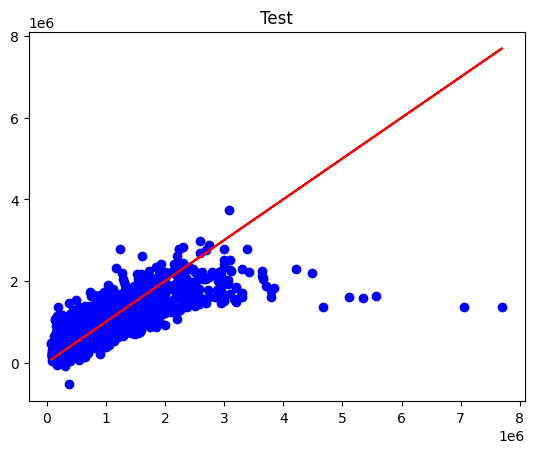

In [150]:
# ridge regression à noyau avec l'approximation nystroem

from sklearn.kernel_ridge import KernelRidge
from sklearn.kernel_approximation import Nystroem

feature_map_nystroem = Nystroem(n_components=500) # gamma = 1/ nb de variable, kernel = 'rbf'
X_trans = feature_map_nystroem.fit_transform(X_train)
list_alpha = [1e-8, 1e-5, 1e-3, 1e-1, 1, 10, 100, 1000]
rig_ker_nystr = RidgeCV(alphas = list_alpha)
rig_ker_nystr.fit(X_trans, y_train)

# rig_ker_nystr.score(X_train, y_train)

kf_ker = KFold(n_splits = 5,shuffle=True, random_state=0)
k2_ker = cross_val_score(rig_ker_nystr, X_trans, y_train, cv = kf_ker)
s2_ker = 0
for i in range(5):
    s2_ker += k2_ker[i]
r2_ker_nystr = s2_ker/5
print('APPRENTISSAGE - R2 score - Régression ridge à noyau: ', r2_ker_nystr)
X_pred = rig_ker_nystr.predict(X_trans)
plt.scatter(y_train, X_pred, color="b")
plt.plot(y_train, y_train, color="r")
plt.title('Test')

Nous avons rencontré un petit problème concernant le test. Nous remplaçons la valeur R2 sur l'ensemble de test par celle sur l'ensemble d'entraînement.

In [151]:
# test de la performance

#X_pred = rig_ker_nystr.predict(Nystroem(n_components = 500).fit_transform(X_test))
#plt.scatter(y_test, X_pred, color="b")
#plt.plot(y_test, y_test, color="r")
#r2_ker_nystr = r2_score(y_test, X_pred)
#r2_ker_nystr

# Arbre De Décision

L'arbre de décision est principalement pour la classification, mais nous pouvons aussi adapter à notre problème de régression. S'il existe une diversité dans le modèle de variation entre les données, aucun modèle linéaire ne donnera de bons résultats. Nous avons donc voulu essayer une régression par arbre de décision. Tout d'abord, pour chaque variable, nous choisissons un point de coupure pour diviser l'ensemble d'entraînement en deux parties et nous prenons la moyenne de chacune d'entre elles. Ensuite, pour chaque point de coupure, nous comparons la valeur MSE et sélectionnons le meilleur point de coupure. Enfin, nous comparons les meilleurs points de coupure pour chaque variable afin de déterminer la racine de l'arbre de décision. En répétant le processus ci-dessus, nous construisons notre arbre de décision.

En ce qui concerne les paramètres, nous choisissons le meilleur point de coupure selon la valeur MSE à chaque fois et un point de coupure divise l'ensemble d'entraînement en deux parties par défaut. Dans un premier temps, nous ne limitons pas la profondeur de notre arbre de décision. Si nous rencontrons un problème de sur-apprentissage ou notre arbre de décision n'est pas efficace, nous changerons. Parce que si notre arbre de décision retient tous les détails, il y aura nombreux de feuilles et la profondeur sera aussi énorme. Il est possible d'avoir un problème de sur-apprentissage. C'est difficile d'adpater aux nouvelles valeurs. La variance est grande.

In [152]:
# arbre de décision

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)
kf_dt = KFold(n_splits = 5,shuffle=True, random_state=0)
k2_dt = cross_val_score(dt, X_train, y_train, cv = kf_dt)
s2_dt = 0
for i in range(5):
    s2_dt += k2_dt[i]
s2_dt/5

0.7416645727545449

Nous voulons bien voir notre arbre de décision, mais c'est impossible de dessiner l'arbre complet, nous dessinons seulement un arbre de décision avec 20 données.

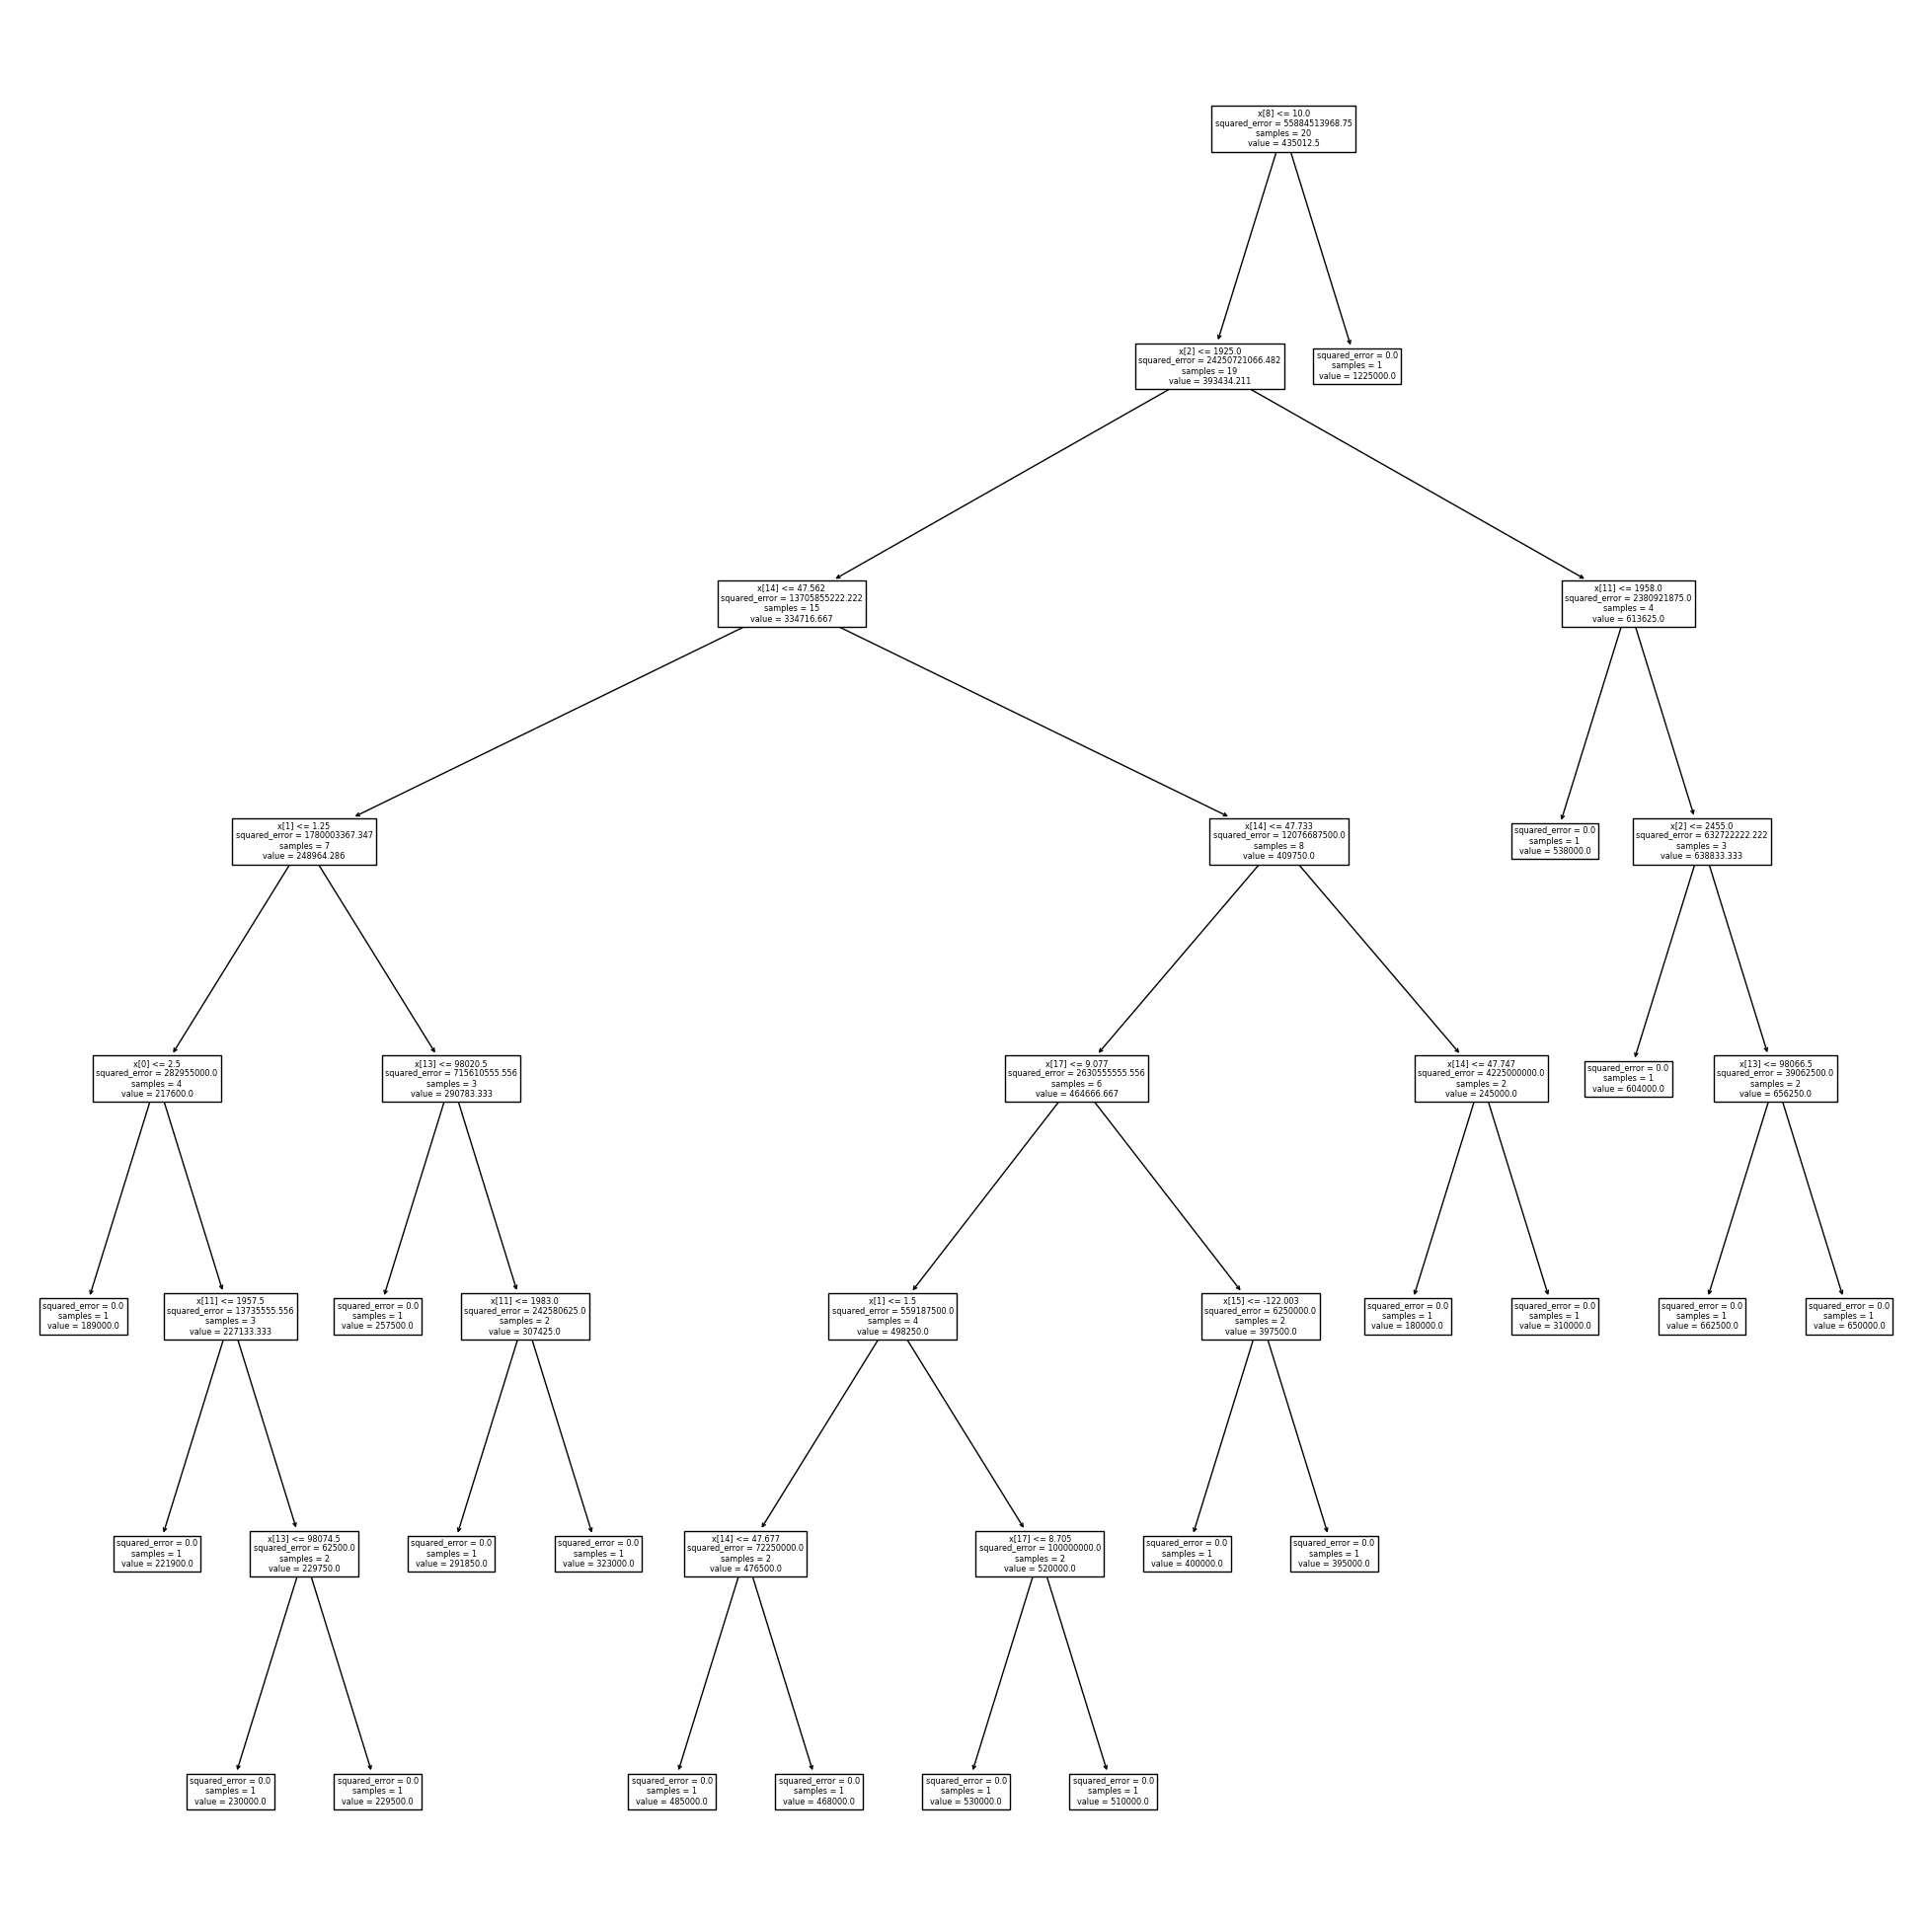

In [153]:
# visualisation de l'arbre de décision avec un sous-ensemble
dt_ex = DecisionTreeRegressor(random_state=0)
dt_ex.fit(X_ex,y_ex)
from sklearn import tree
plt.figure(figsize=(25,25))
tree.plot_tree(dt_ex);

TEST - R2 score - Arbre de décision:  0.7706007661783316


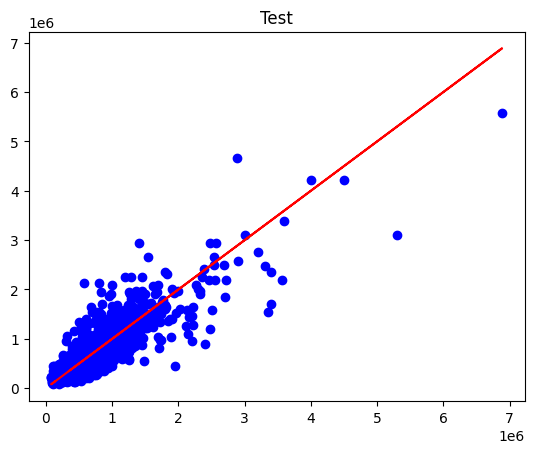

In [154]:
# test de la performance

dt.fit(X_train,y_train)
X_pred = dt.predict(X_test)
plt.scatter(y_test, X_pred, color="b")
plt.plot(y_test, y_test, color="r")
plt.title('Test')
r2_dt = r2_score(y_test, X_pred)
print('TEST - R2 score - Arbre de décision: ', r2_dt)

# Forêt Aléatoire

L'algorithme forêt aléatoire résout ce problème en combinant les prédictions faites par plusieurs arbres de décision et en renvoyant un seul résultat. En raison de leur nature aléatoire, les forêts aléatoires sont efficaces pour réduire la variance du modèle. Nous voulons donc essayer l'approche de la forêt aléatoire.

Tout d'abord, nous déterminons le nombre d'arbres de décision à créer, N. Ensuite, nous sélectionnons au hasard K échantillons de données dans l'ensemble d'entraînement à l'aide de la méthode de Bootstrapping qui controle aussi la valeur K. Puis, nous utilisons ces K échantillons de données pour créer un arbre de décision. Enfin, nous répétons les étapes ci-dessus jusqu'à ce que nous ayons créé N arbres de décision. Comme il s'agit d'un problème de régression, la moyenne des N arbres de décision est considérée comme la prédiction finale.

En ce qui concerne la sélection des paramètres:
* max_samples : indique le nombre d'échantillons à tirer des données d'entraînement dans l'échantillonnage Bootstrap. 
* max_depth : indique la profondeur maximale de l'arbre, que nous spécifions si nécessaire.
* n_estimators : indique le nombre d'arbres de décision à créer dans le modèle de forêt aléatoire. Par défaut, il est de 100.
* Nous utilisons la valeur de MSE pour évaluer les arbres de décision par défaut.

Plus d'arbre de décision et plus de feuilles, nous avons plus d'informations en détail. Nous avons une possiblilté plus haute d'avoir un problème de sur-apprentissage, c'est mieux qu'un seul arbre de décision quand même, grâce à sa nature aléatoire et la moyenne de N arbre de décision.

In [155]:
# forêt aléatoire

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators = 10)
kf_rf = KFold(n_splits = 5,shuffle=True, random_state=0)
k2_rf = cross_val_score(rf, X_train, y_train, cv = kf_rf)
s2_rf = 0
for i in range(5):
    s2_rf += k2_rf[i]
r2_rf = s2_rf/5
r2_rf

0.8532033815371272

TEST - R2 score - Forêt Aléatoire:  0.8503693654273597


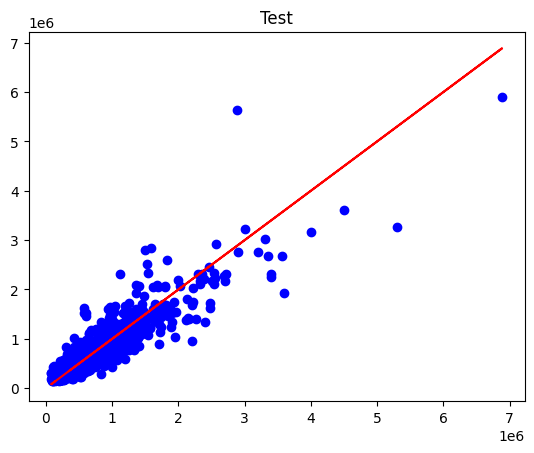

In [156]:
# teste de la performance

rf.fit(X_train,y_train)
X_pred = rf.predict(X_test)
plt.scatter(y_test, X_pred, color="b")
plt.plot(y_test, y_test, color="r")
plt.title('Test')
r2_rf = r2_score(y_test, X_pred)
print('TEST - R2 score - Forêt Aléatoire: ', r2_rf)

Nous obtenons une valeur R2 assez bonne, mais il existe peut-être un problème léger de sur-apprentissage. Parce que nous avons testé plusieurs fois, la valeur R2 sur le test était parfois inférieur à celle de l'ensemble d'entraînement. C'est-à-dire que notre modèle n'adapte pas parfaitement de nouvelles données. C'est déjà notre meilleur modèle jusqu'à présent.

# Réseaux De Neurones

Nous voulons aussi implémenter l'approche réseaux de neurones avec Tensorflow. Premèrement, nous construisons un réseau de quatre couches, une couche d'entrée, une couche de sortie et deux couches cachées. Afin d'avoir un résultat précis, nous mettons 256 neurones dans chaque couche cachées. La fonction d'activation de la couche cachée et d'entrée est généralement celle qui ajoute un élément non linéaire à notre modèle, comme la fonction Sigmoide ou la fonction ReLu. Nous choisissons la fonction ReLu. Elle est émise lorsque le résultat de l'opération matricielle est positif, ou zéro s'il ne l'est pas. Pour une question de régression, la fonction d'activation de la couche de sortie est souvent la fonction linéaire. Après avoir discuté avec nos camarades du même groupe, ils ont résolu le problème de la prédiction de la qualité du vin, qui est un problème de classification. Ils ont utilisé la fonction Softmax dans la couche de sortie pour rendre la prédiction probabiliste. Notre problème étant un problème de régression continue, cette fonction n'est pas utile dans notre cas.

L'itération et la rétropropagation sont des méthodes couramment utilisées dans les réseaux de neurones pour déterminer les paramètres. À chaque itération, la différence entre la valeur prédite et la valeur réelle est utilisée pour ajuster les paramètres. La distance minimale est atteinte étape par étape.
* Nous utilisons la méthode de descente de gradient d'Adam, qui calcule non seulement la dérivée actuelle, mais prend également en compte les valeurs précédentes. La méthode d'Adam est plus rapide et plus précise lorsqu'il y a beaucoup de petites fluctuations dans la courbe. Dans cette méthode, c'est le taux d'apprentissage qu'il faut ajuster. Lorsque la valeur est trop élevée, la solution optimale risque d'être sautée. En revanche, lorsque la valeur est trop faible, la vitesse de la convergence n'est pas rapide.
* Le critère que nous avons choisi est la valeur MAE. Par rapport à la valeur MSE, nous calculons la moyenne des valeurs absolues des différences au lieu de la moyenne des carrés des différences. C'est moins sensible aux erreurs élevées.

In [157]:
# construction du model avec tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

model = Sequential(
    [
        Dense(units=128, input_dim=X_train.shape[1], activation="relu"), #kernel_initializer='normal
        Dense(units=256, activation="relu"),
        Dense(units=256, activation="relu"),
        Dense(units=1, activation="linear"),
    ], name="kc_model"
)

In [158]:
X_train_numpy = np.array(X_train)
y_train_numpy = np.array(y_train)
X_test_numpy = np.array(X_test)
y_test_numpy = np.array(y_test)
X_train_numpy.shape

(17290, 18)

Il y a nombreux de paramères que nous pouvons manipuler, nous avons choisi certains pour améliorer la qualité de notre modèle.
* epochs: représente le nombre d'itération
* batch_size: indique le nombre de données (échantillons) transmises au programme pour l'entraînement en une seule session
* validation_split: spécifie la proportion d'ensembles de validation à découper à partir de l'ensemble de données

In [159]:
model.compile(
    loss=tf.keras.losses.MeanAbsoluteError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

history = model.fit(
    X_train_numpy, y_train_numpy,
    epochs=50,
    batch_size=50,
    validation_split=0.2,
)

Epoch 1/50
277/277 [==============================] - 1s 2ms/step - loss: 177942.8125 - mean_absolute_error: 177942.8125 - val_loss: 104819.4609 - val_mean_absolute_error: 104819.4609
Epoch 2/50
277/277 [==============================] - 0s 2ms/step - loss: 108664.3672 - mean_absolute_error: 108664.3672 - val_loss: 103244.5547 - val_mean_absolute_error: 103244.5703
Epoch 3/50
277/277 [==============================] - 0s 2ms/step - loss: 106119.3750 - mean_absolute_error: 106119.3750 - val_loss: 102420.6641 - val_mean_absolute_error: 102420.6641
Epoch 4/50
277/277 [==============================] - 1s 2ms/step - loss: 104050.4531 - mean_absolute_error: 104050.4531 - val_loss: 100292.2734 - val_mean_absolute_error: 100292.2734
Epoch 5/50
277/277 [==============================] - 0s 2ms/step - loss: 103279.4688 - mean_absolute_error: 103279.4688 - val_loss: 99358.8047 - val_mean_absolute_error: 99358.8047
Epoch 6/50
277/277 [==============================] - 0s 2ms/step - loss: 102955.6

# Taux D'apprentissage Différents

Nous voulons visualiser l'influence du taux d'apprentissage pendant le processus d'apprentissage et choisir le meilleur pour notre modèle. Dans notre cas, nous allons comparer trois taux d'apprentissage, 0.1, 0.01 et 0.001.

In [160]:
# modèle des réseaux de neurones
def neural_network(num_layer, units, learning_rate=0.001):
    """
    Parameters
    ----------
    num_layer       : int
                    number of layers
    units           : list
                    number of units in each layer
    learning_rate   : float
                    learning rate of the optimizer of the model
    """
    if (len(units) != num_layer):
        raise ValueError("Number of list of units must be equal to number of layers")
    model = Sequential()
    model.add(Dense(units=units[0], input_dim=X_train.shape[1], activation="relu"))
    for i in range(1, num_layer-1):
        model.add(Dense(units=units[i], activation="relu"))
    model.add(Dense(units=1, activation="linear"))
    model.compile(
        loss=tf.keras.losses.MeanAbsoluteError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )
    return model

In [161]:
# itération

histories_neural_network = []
def neural_network_score(num_layer, units, learning_rate=[0.001, 0.01, 0.1]):
    """
    Parameters
    ----------
    num_layer       : int
                    number of layers
    units           : list
                    number of units in each layer
    learning_rate   : list
                    learning rate of the optimizer of the model
    """
    if (len(units) != num_layer):
        raise ValueError('Le nombre de couches doit être égale à la taille de la liste des neurones')
    for i in range(len(learning_rate)):
        model = neural_network(num_layer, units, learning_rate=learning_rate[i])
        model.save(f"neural_network_model_{i}.h5")
        history = model.fit(
            X_train_numpy, y_train_numpy,
            epochs=50,
            batch_size=50,
            validation_split=0.2
        )
        histories_neural_network.append(history)
        y_pred = model.predict(X_test)
        y_pred = np.reshape(y_pred, (y_pred.shape[0],))
        print(f'TEST - R2 score avec le taux {learning_rate[i]} : {r2_score(y_test_numpy, y_pred)}')
        print(f'TEST - MAE score avec le taux {learning_rate[i]} : {history.history["val_loss"][-1]}')

In [162]:
# entraînement des modèles différents 
num_layer = 4
units = [128, 256, 256, 1]
neural_network_score(num_layer, units)

Epoch 1/50
277/277 [==============================] - 1s 2ms/step - loss: 420981.8438 - mean_absolute_error: 420981.8438 - val_loss: 189944.3750 - val_mean_absolute_error: 189944.3750
Epoch 2/50
277/277 [==============================] - 1s 2ms/step - loss: 152393.6719 - mean_absolute_error: 152393.6719 - val_loss: 123526.8203 - val_mean_absolute_error: 123526.8203
Epoch 3/50
277/277 [==============================] - 1s 2ms/step - loss: 120090.1250 - mean_absolute_error: 120090.1250 - val_loss: 110961.9766 - val_mean_absolute_error: 110961.9688
Epoch 4/50
277/277 [==============================] - 1s 2ms/step - loss: 112920.3281 - mean_absolute_error: 112920.3281 - val_loss: 107478.9609 - val_mean_absolute_error: 107478.9609
Epoch 5/50
277/277 [==============================] - 1s 2ms/step - loss: 110204.1719 - mean_absolute_error: 110204.1719 - val_loss: 105449.8125 - val_mean_absolute_error: 105449.8125
Epoch 6/50
277/277 [==============================] - 1s 2ms/step - loss: 108639

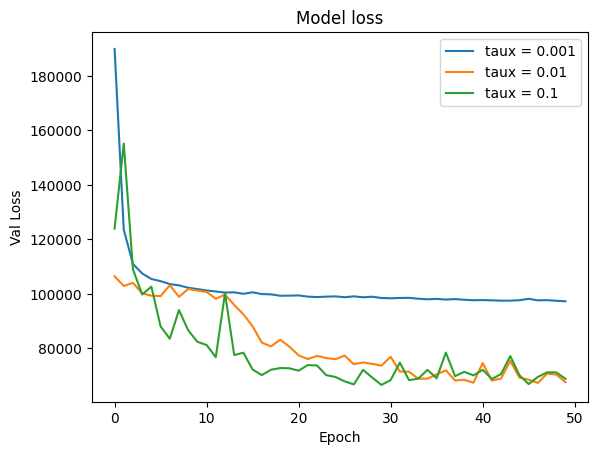

In [163]:
#Visualiser les traces
from sklearn.metrics import r2_score
plt.plot(histories_neural_network[0].history['val_loss'])
plt.plot(histories_neural_network[1].history['val_loss'])
plt.plot(histories_neural_network[2].history['val_loss'])
plt.title('Model loss')  
plt.ylabel('Val Loss')  
plt.xlabel('Epoch')  
plt.legend(['taux = 0.001', 'taux = 0.01', 'taux = 0.1'], loc='upper right')  
plt.show()

* Le taux 0.001 n'est pas très bon, parce que nous n'avons pas de nombre suffisant d'itérations, il converge lentement. Si nous augmentons le nombre d'itération, il convergera comme vers les autres.
* Les taux 0.01 et 0.1 sont presque pareils, mais nous choisissons le taux 0.01. Même si le taux 0.1 converge plus vite mais il existe plusieurs fluctuations sur la courbe, nous ne voulons pas prendre le risque de sauter l'optimal.

136/136 [==============================] - 0s 722us/step
TEST - R2 score - Réseau de neurones:  0.8946721248774077


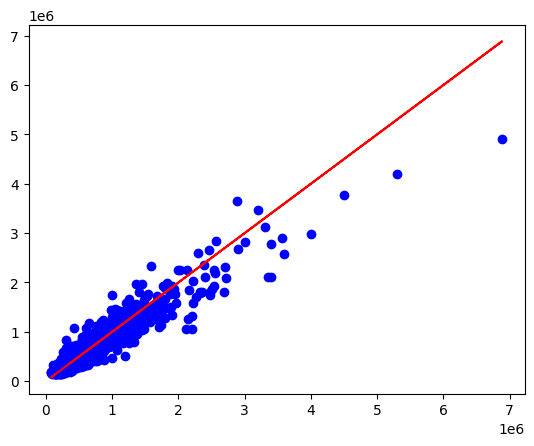

In [164]:
# test de la performance

X_test_numpy = np.array(X_test)
y_test_numpy = np.array(y_test)
y_pred = model.predict(X_test_numpy)
y_pred = np.reshape(y_pred, (y_pred.shape[0],))
plt.scatter(y_test, y_pred, color="b")
plt.plot(y_test, y_test, color="r")
r2_nn = r2_score(y_test_numpy, y_pred)
print('TEST - R2 score - Réseau de neurones: ', r2_nn)

In [165]:
#from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#from math import sqrt

#RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
#MSE = mean_squared_error(y_test_orig, y_predict_orig)
#MAE = mean_absolute_error(y_test_orig, y_predict_orig)
#r2 = r2_score(y_test_orig, y_predict_orig)
#adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

#print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 

# Conclusion

In [166]:
# comparaison des modèles différents

print('TEST - R2 score - Régression Linéaire: ', r2_lin)
print('TEST - R2 score - Ridge Régression Linéaire: ', r2_lin_svd)
print('APPRENTISSAGE - R2 score - Régression ridge à noyau: ', r2_ker_nystr)
print('TEST - R2 score - Arbre de décision: ', r2_dt)
print('TEST - R2 score - Forêt Aléatoire: ', r2_rf)
print('TEST - R2 score - Réseau de neurones: ', r2_nn)

TEST - R2 score - Régression Linéaire:  0.7120055863639565
TEST - R2 score - Ridge Régression Linéaire:  0.7127543175703345
APPRENTISSAGE - R2 score - Régression ridge à noyau:  0.7386408383907825
TEST - R2 score - Arbre de décision:  0.7706007661783316
TEST - R2 score - Forêt Aléatoire:  0.8503693654273597
TEST - R2 score - Réseau de neurones:  0.8946721248774077


En comparant les valeurs R2 de différents modèles, l'approche réseaux de neurones nous donne la meilleure qualité de la prédiction sur les données. C'est parce que la méthodes réseaux de neurones est plus flexible à notre avis. Le nombre de couches, le nombre de neurones, la fonction d'activation et beaucoup de paramètres peuvent être manipulés. Nous avons plusieurs façons pour améliorer le modèle, mais l'entraînement des réseaux de neurones n'est pas assez efficace si nous voulons tester pleine de paramètres. 

# FIN DU RAPPORT